In [1]:
# Import all dependencies/Packages/ Modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Data collection

train_data = pd.read_csv("C:\\Users\\hp\\OneDrive\\Documents\\Data Science\\anime_ratings_data.csv")

In [4]:
# Checking the data

train_data.head(6)

,title,mediaType,eps,duration,startYr,finishYr,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
0,Dragon Ball Z Movie 15: Resurrection 'F',Movie,1,67.0,2015,2015,Even the complete obliteration of his physical...,No,4649,86,3.979,3100.0,Toei Animation,No,Other
1,Kuripuri*Kuripura,Movie,1,5.0,2008,2008,NaN,No,10,0,2.120,10.0,Others,No,Other
2,GJ-bu@,TV Special,1,46.0,2014,2014,The story is set during the spring vacation im...,No,1630,16,3.758,1103.0,Others,No,Other
3,Nausicaa of the Valley of the Wind,Movie,1,67.0,1984,1984,One thousand years after the Giant Warriors ca...,No,4649,184,4.444,3100.0,Others,No,Drama
4,Miru Tights Special,DVD Special,1,4.0,2019,2019,Yua is asked to model an illustrator's designs...,No,346,8,2.494,234.0,Others,No,Other
5,Da Capo Second Season,TV,26,5.0,2005,2005,"Hatsune-Jima, a city once known for their ever...",No,4649,187,3.520,3100.0,Others,No,Other


In [18]:
train_data.genre.value_counts(), train_data.contentWarn.value_counts()

(Other               5468
 Adventure            267
 Romance              198
 Drama                152
 Sci Fi               128
 Comedy                98
 Fantasy               84
 Action                78
 Based on a Manga      50
 Name: genre, dtype: int64,
 No     5825
 Yes     698
 Name: contentWarn, dtype: int64)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6523 entries, 0 to 6522
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           6523 non-null   object 
 1   mediaType       6496 non-null   object 
 2   eps             6523 non-null   int64  
 3   duration        6248 non-null   float64
 4   startYr         6523 non-null   int64  
 5   finishYr        6523 non-null   int64  
 6   description     4114 non-null   object 
 7   contentWarn     6523 non-null   object 
 8   watched         6523 non-null   int64  
 9   watching        6523 non-null   int64  
 10  rating          6523 non-null   float64
 11  votes           6496 non-null   float64
 12  studio_primary  6523 non-null   object 
 13  studios_colab   6523 non-null   object 
 14  genre           6523 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 764.5+ KB


In [6]:
# Checking for missing values

train_data.isna().sum()

title                0
mediaType           27
eps                  0
duration           275
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes               27
studio_primary       0
studios_colab        0
genre                0
dtype: int64

In [7]:
# Handling missing values

# 1. Drop the columns
# 2. replace missing values

train_data = train_data.drop(columns='description', axis=1)

In [8]:
train_data.head()

,title,mediaType,eps,duration,startYr,finishYr,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
0,Dragon Ball Z Movie 15: Resurrection 'F',Movie,1,67.0,2015,2015,No,4649,86,3.979,3100.0,Toei Animation,No,Other
1,Kuripuri*Kuripura,Movie,1,5.0,2008,2008,No,10,0,2.120,10.0,Others,No,Other
2,GJ-bu@,TV Special,1,46.0,2014,2014,No,1630,16,3.758,1103.0,Others,No,Other
3,Nausicaa of the Valley of the Wind,Movie,1,67.0,1984,1984,No,4649,184,4.444,3100.0,Others,No,Drama
4,Miru Tights Special,DVD Special,1,4.0,2019,2019,No,346,8,2.494,234.0,Others,No,Other


In [9]:
# 2. Replacing missing values

# train_data['duration'].mean()


train_data['duration'].fillna(train_data['duration'].mean(), inplace=True)

In [10]:
# train_data['Embarked'].mode()[0]

train_data['votes'].fillna(train_data['votes'].mode()[0], inplace=True)
train_data['mediaType'].fillna(train_data['mediaType'].mode()[0], inplace=True)

In [11]:
train_data.head()

,title,mediaType,eps,duration,startYr,finishYr,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
0,Dragon Ball Z Movie 15: Resurrection 'F',Movie,1,67.0,2015,2015,No,4649,86,3.979,3100.0,Toei Animation,No,Other
1,Kuripuri*Kuripura,Movie,1,5.0,2008,2008,No,10,0,2.120,10.0,Others,No,Other
2,GJ-bu@,TV Special,1,46.0,2014,2014,No,1630,16,3.758,1103.0,Others,No,Other
3,Nausicaa of the Valley of the Wind,Movie,1,67.0,1984,1984,No,4649,184,4.444,3100.0,Others,No,Drama
4,Miru Tights Special,DVD Special,1,4.0,2019,2019,No,346,8,2.494,234.0,Others,No,Other


In [12]:
# Checking for missing data

train_data.isna().sum()

title             0
mediaType         0
eps               0
duration          0
startYr           0
finishYr          0
contentWarn       0
watched           0
watching          0
rating            0
votes             0
studio_primary    0
studios_colab     0
genre             0
dtype: int64

In [13]:
# brief summary/stats of our dataset

train_data.describe()

,eps,duration,startYr,finishYr,watched,watching,rating,votes
count,6523.000000,6523.000000,6523.000000,6523.000000,6523.000000,6523.000000,6523.000000,6523.000000
mean,8.716235,18.396287,2005.241147,2005.575349,1347.948643,57.445654,2.962553,915.333589
std,11.002479,20.502929,12.911035,12.568169,1737.138112,76.527405,0.760486,1177.703621
min,1.000000,1.000000,1967.000000,1970.000000,5.000000,0.000000,1.111000,10.000000
25%,1.000000,5.000000,2000.000000,2000.000000,56.000000,2.000000,2.371000,35.000000
50%,1.000000,8.000000,2010.000000,2010.000000,349.000000,13.000000,2.944000,231.000000
75%,12.000000,25.000000,2015.000000,2015.000000,2252.500000,98.000000,3.568000,1607.500000
max,34.000000,67.000000,2020.000000,2020.000000,4649.000000,199.000000,4.702000,3100.000000


## EDA

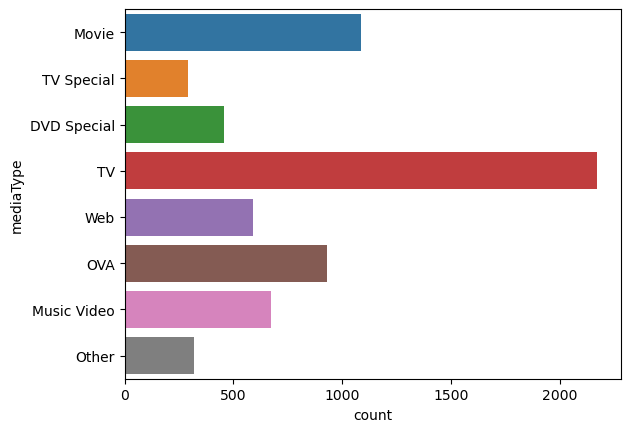

In [25]:
sns.countplot(y ='mediaType', data=train_data);

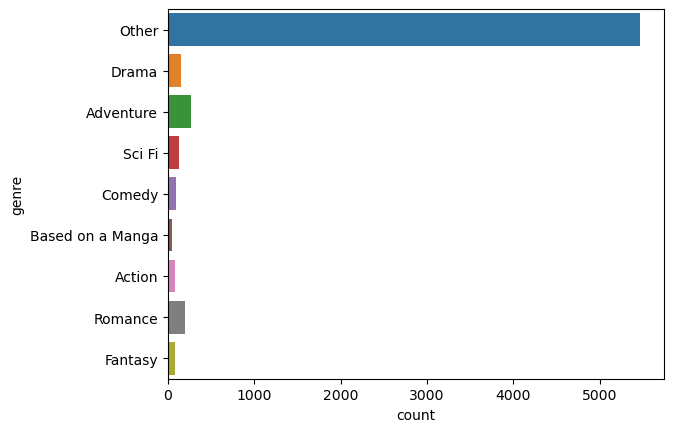

In [24]:
sns.countplot(y = 'genre', data=train_data);

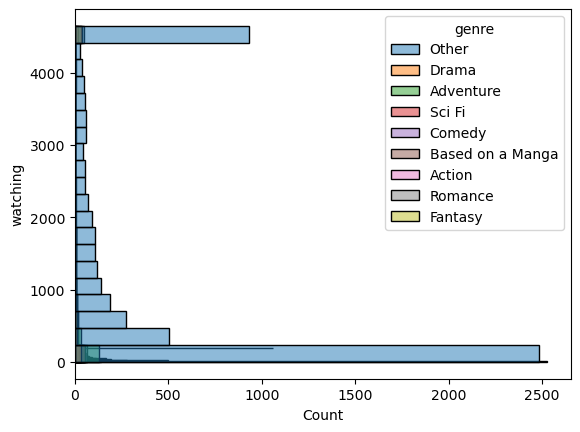

In [42]:
sns.histplot(y = 'watching', data=train_data, hue = 'genre');

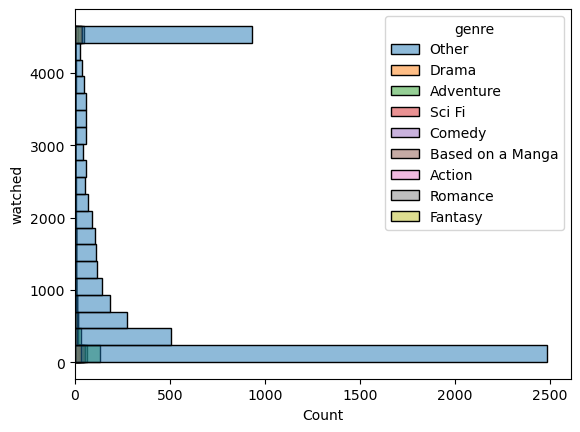

In [43]:
sns.histplot(y = 'watched', data=train_data, hue = 'genre');

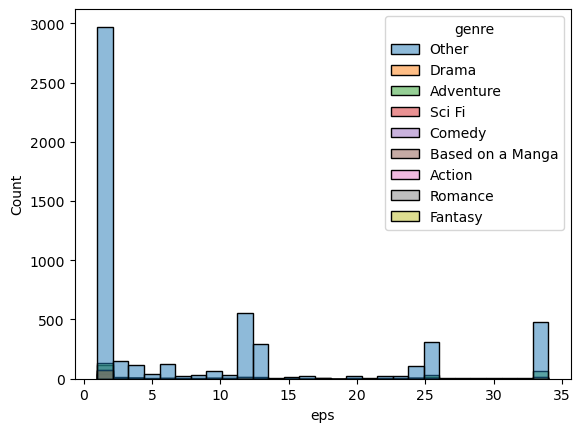

In [46]:
sns.histplot(x = 'eps', data=train_data, hue = 'genre');

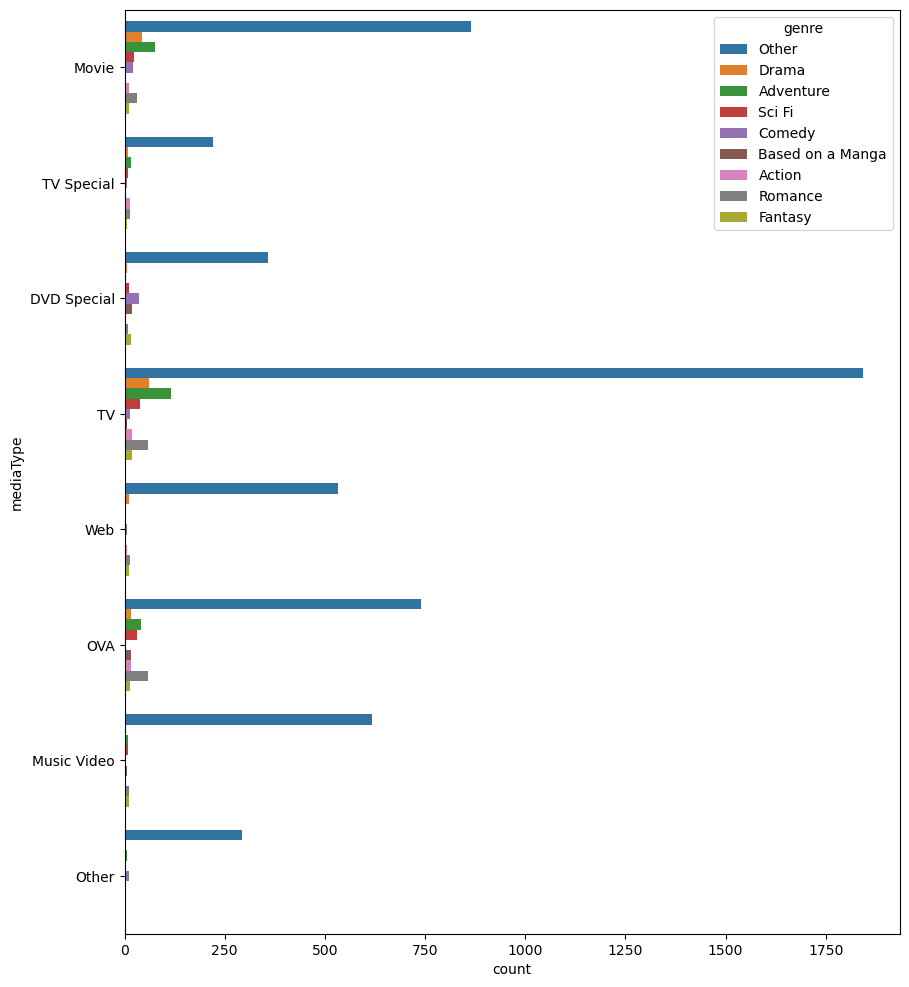

In [63]:
a = sns.countplot(y ='mediaType', hue = 'genre', data=train_data)


In [67]:
train_data.columns

Index(['title', 'mediaType', 'eps', 'duration', 'startYr', 'finishYr',
       'contentWarn', 'watched', 'watching', 'rating', 'votes',
       'studio_primary', 'studios_colab', 'genre'],
      dtype='object')

In [68]:
train_data = train_data.drop(columns= ['title', 'studio_primary', 'studios_colab'], axis=1)

# Resolving Categorical Values

In [76]:
# Resolving Categorical Values
train_data.mediaType.value_counts()

TV             2172
Movie          1085
OVA             933
Music Video     674
Web             590
DVD Special     457
Other           320
TV Special      292
Name: mediaType, dtype: int64

In [74]:
train_data.contentWarn.value_counts()

No     5825
Yes     698
Name: contentWarn, dtype: int64

In [75]:
train_data.genre.value_counts()

Other               5468
Adventure            267
Romance              198
Drama                152
Sci Fi               128
Comedy                98
Fantasy               84
Action                78
Based on a Manga      50
Name: genre, dtype: int64

In [88]:
train_data.replace({'contentWarn': {'Yes':0, 'No':1}, 'genre': {"Other":0, "Adventure":1, "Romance ":2,
                                                              "Drama":3, "Sci Fi":4, "Comedy":5, "Fantasy":6, "Action": 7,
                                                                "Based on a Manga":8, "Romance":9  },
                   'mediaType': {"TV":0, "Movie":1, "OVA":2, "Music Video": 3, "Web":4, "DVD Special":5,
                                "Other":6, "TV Special": 7}}, inplace=True)

## Creating & Training the Model

In [89]:
train_data.columns

Index(['mediaType', 'eps', 'duration', 'startYr', 'finishYr', 'contentWarn',
       'watched', 'watching', 'rating', 'votes', 'genre'],
      dtype='object')

In [90]:
X = train_data.drop(columns=['startYr', 'finishYr', 'rating'], axis=1)
y = train_data["rating"]



In [91]:
X.head()

,mediaType,eps,duration,contentWarn,watched,watching,votes,genre
0,1,1,67.0,1,4649,86,3100.0,0
1,1,1,5.0,1,10,0,10.0,0
2,7,1,46.0,1,1630,16,1103.0,0
3,1,1,67.0,1,4649,184,3100.0,3
4,5,1,4.0,1,346,8,234.0,0


In [92]:
y.head()

0    3.979
1    2.120
2    3.758
3    4.444
4    2.494
Name: rating, dtype: float64

In [93]:
# Splitting data set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=3)

In [94]:
X_train.shape, X_test.shape

((5544, 8), (979, 8))

In [95]:
# Model development

model = LogisticRegression()

In [109]:
# Model training

model.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

In [98]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values

lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)


In [115]:
y_int = y_train.astype(int)

In [113]:
# Model training

model.fit(X_train, y_int)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [116]:
# NMaking prediction

predictions = model.predict(X_train)

In [117]:
predictions

array([2, 2, 3, ..., 2, 2, 2])

In [118]:
# Accuracy score of our model
acc = accuracy_score(y_int, predictions)

In [119]:
print("The model accuracy is: ", acc * 100)

The model accuracy is:  57.052669552669556


In [120]:
test_predictions = model.predict(X_test)

In [121]:
test_acc = accuracy_score(y_test, test_predictions)

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

In [122]:
y_test_int = y_test.astype(int)

In [123]:
test_acc = accuracy_score(y_test_int, test_predictions)

In [124]:
print("The model accuracy on testing set is: ", test_acc * 100)

The model accuracy on testing set is:  59.34627170582226
